In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from made import MADE
from data.toydata import ToyDataset

from train import train_forward
from scores import log_likelihood
from scores import difference_loglik

from utils import update_device

In [5]:
from flows import create_iaf
from flows import create_maf
from flows import create_paf
from flows import create_realnvp
from flows import create_flows

In [7]:
from structure.ar import AR
from structure.iar import IAR
from structure.twoblock import TwoBlock

from transforms.affine import Affine
from transforms.piecewise import PiecewiseAffine

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device_cpu = torch.device("cpu")

In [ ]:
dataset = ToyDataset()

In [8]:
dim_input = 2
dim_hidden = [10,10,10]
num_trans = 8
perm_type = 'alternate'

In [10]:
transformations = [Affine, Affine, PiecewiseAffine, PiecewiseAffine, Affine, Affine, PiecewiseAffine, PiecewiseAffine]
structures = IAR

In [42]:
flow = create_iaf(dim_input, dim_hidden, num_trans, perm_type)
#flow = create_maf(dim_input, dim_hidden, num_trans, perm_type)
#flow = create_paf(dim_input, dim_hidden, num_trans, perm_type)
#flow = create_realnvp(dim_input, dim_hidden, num_trans, perm_type)
#flow = create_flows(dim_input, dim_hidden, num_trans, perm_type, structure=structures, transformation=transformations)

In [46]:
update_device(device, flow, dataset)

#optimizer = torch.optim.AdamW(flow.parameters(), lr=1e-3)
optimizer = torch.optim.SGD(flow.parameters(), lr=1e-3)

loss = train_forward(flow, flow.get_base_distr(), dataset.get_training_data(), optimizer, epochs=200, batch_size=16,print_n=10)

update_device(device_cpu, flow, dataset)

     2.35195


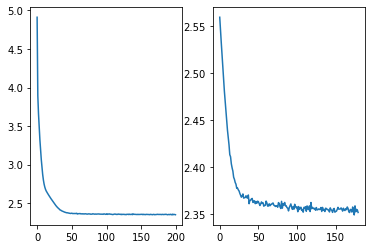

In [47]:
plt.subplot(1,2,1)
plt.plot(loss)

plt.subplot(1,2,2)
plt.plot(loss[20:])

In [48]:
train_data = dataset.get_training_data()

In [50]:
with torch.no_grad():
    sample, log_prob = flow.sample(800)
    sample_last = sample[-1].detach().numpy()

(-1.1439754962921143, 5.53448486328125)

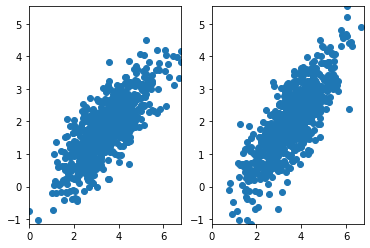

In [51]:
xlims = (min(sample_last[:,0].min(), train_data[:,0].min())), max(sample_last[:,0].max(), train_data[:,0].max())
ylims = (min(sample_last[:,1].min(), train_data[:,1].min())), max(sample_last[:,1].max(), train_data[:,1].max())

plt.subplot(1,2,1)
plt.scatter(sample_last[:,0], sample_last[:,1])
plt.xlim(xlims)
plt.ylim(ylims)

plt.subplot(1,2,2)
plt.scatter(train_data[:,0].to('cpu'), train_data[:,1].to('cpu'))
plt.xlim(xlims)
plt.ylim(ylims)

In [52]:
log_prob_target = dataset.evaluate(sample[-1])
torch.mean(torch.abs(log_prob_target - log_prob))

tensor(0.2597)

In [53]:
with torch.no_grad():
    z_train, log_prob_train = flow.evaluate(train_data)

In [54]:
log_prob_train_target = dataset.evaluate(train_data)

In [55]:
torch.mean(torch.abs(log_prob_train_target-log_prob_train))

tensor(0.0647)

In [56]:
torch.mean(log_prob_train), torch.mean(log_prob_train_target)

(tensor(-2.3530), tensor(-2.3488))

In [57]:
test_data = dataset.get_test_data()

In [58]:
with torch.no_grad():
    z_train, log_prob_test = flow.evaluate(test_data)

In [59]:
log_prob_test_target = dataset.evaluate(test_data)

In [60]:
torch.mean(torch.abs(log_prob_test_target-log_prob_test))

tensor(0.0654)

In [61]:
torch.mean(log_prob_test), torch.mean(log_prob_test_target)

(tensor(-2.4280), tensor(-2.4195))

In [62]:
log_lik, mean = log_likelihood(train_data, flow)

In [63]:
log_lik_diff, mean_diff = difference_loglik(train_data, dataset, flow)

In [64]:
log_lik_diff, mean_diff

([array([3.19885015e-02, 5.64792156e-02, 6.85176849e-02, 4.28910255e-02,
         1.51097775e-02, 1.38054132e-01, 2.73430347e-02, 1.15182400e-01,
         9.20367241e-02, 1.30307674e-02, 7.47289658e-02, 8.74371529e-02,
         8.63635540e-02, 7.38842487e-02, 5.73741198e-02, 6.74335957e-02,
         5.51334620e-02, 6.81686401e-02, 1.60226822e-02, 8.48221779e-02,
         6.42895699e-02, 3.43749523e-02, 1.14140511e-02, 1.72661781e-01,
         4.02742624e-02, 8.12022686e-02, 4.13935184e-02, 1.16336346e-02,
         5.68797588e-02, 1.93017721e-01, 3.06320190e-03, 1.28374100e-02,
         2.16243267e-01, 3.49617004e-03, 1.61379576e-02, 4.44283485e-02,
         5.10077477e-02, 4.06432152e-02, 7.20212460e-02, 8.10930729e-02,
         1.78129673e-01, 4.63955402e-02, 6.43777847e-02, 1.21457577e-02,
         9.91749763e-02, 5.00082970e-02, 4.35349941e-02, 1.19362116e-01,
         5.08301258e-02, 3.68421078e-02, 3.53832245e-02, 6.20968342e-02,
         4.50477600e-02, 4.42833900e-02, 2.43056774